**Cleane the dataset and split it**

In [1]:
# 📌 Cell 1 — Import Libraries, Load & Prepare Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Steel_Plates_Faults.csv")

# Clean column names and remove duplicates/missing values
df.columns = df.columns.str.strip()
df = df.dropna().drop_duplicates()

# Save cleaned dataset (optional)
df.to_csv("Steel_Plates_Faults_Cleaned.csv", index=False)
print("✅ Cleaned dataset saved! Shape:", df.shape)

# Define label columns
label_cols = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Separate features (X) and labels (y)
X = df.drop(columns=label_cols)
y = df[label_cols]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


✅ Cleaned dataset saved! Shape: (1941, 34)


**1️⃣ MLP Classifier**

In [2]:
# 📌 Cell 2 — Train & Evaluate MLP Models (20 iterations, no warnings)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import joblib

best_score = 0
best_model = None
architectures = [(50,), (100,), (100, 50)]

for hidden in architectures:
    for rs in range(20):
        model = MLPClassifier(hidden_layer_sizes=hidden, max_iter=20, random_state=rs)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_model = model
            
            # Compute per-label metrics
            precision, recall, f1, support = precision_recall_fscore_support(
                y_test, y_pred, zero_division=0
            )
            result = {
                'accuracy': score,
                'per_label': {
                    label_cols[i]: {
                        'precision': round(float(precision[i]), 4),
                        'recall': round(float(recall[i]), 4),
                        'f1': round(float(f1[i]), 4),
                        'support': int(support[i])
                    } for i in range(len(label_cols))
                }
            }

# Display results
print("✅ Best MLP Accuracy:", round(best_score, 4))
print("\n📊 Per-label metrics for best MLP:")
for label, metrics in result['per_label'].items():
    print(label, metrics)

# Save best model & scaler
joblib.dump(best_model, "best_mlp.pkl")
joblib.dump(scaler, "scaler.pkl")


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_per

✅ Best MLP Accuracy: 0.6195

📊 Per-label metrics for best MLP:
Pastry {'precision': 1.0, 'recall': 0.4138, 'f1': 0.5854, 'support': 29}
Z_Scratch {'precision': 0.8333, 'recall': 0.8537, 'f1': 0.8434, 'support': 41}
K_Scratch {'precision': 0.9747, 'recall': 0.9277, 'f1': 0.9506, 'support': 83}
Stains {'precision': 1.0, 'recall': 0.7692, 'f1': 0.8696, 'support': 13}
Dirtiness {'precision': 1.0, 'recall': 0.125, 'f1': 0.2222, 'support': 8}
Bumps {'precision': 0.617, 'recall': 0.4028, 'f1': 0.4874, 'support': 72}
Other_Faults {'precision': 0.7727, 'recall': 0.5944, 'f1': 0.6719, 'support': 143}


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


['scaler.pkl']

**2️⃣ Random Forest**

In [3]:
# 📌 Cell 3 — Train & Evaluate Random Forest (20 seeds)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import joblib

best_score = 0
best_model = None

for rs in range(20):
    model = RandomForestClassifier(n_estimators=100, random_state=rs)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("RandomForest random_state =", rs, "→ Accuracy:", round(score, 4))
    
    if score > best_score:
        best_score = score
        best_model = model
        
        # Compute per-label metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            y_test, y_pred, zero_division=0
        )
        result_rf = {
            'accuracy': score,
            'per_label': {
                label_cols[i]: {
                    'precision': round(float(precision[i]), 4),
                    'recall': round(float(recall[i]), 4),
                    'f1': round(float(f1[i]), 4),
                    'support': int(support[i])
                } for i in range(len(label_cols))
            }
        }

# Display best results
print("\n✅ Best Random Forest Accuracy:", round(best_score, 4))
print("\n📊 Per-label metrics for best RF:")
for label, metrics in result_rf['per_label'].items():
    print(label, metrics)

# Save best model & scaler
joblib.dump(best_model, "best_rf.pkl")
joblib.dump(scaler, "scaler.pkl")


RandomForest random_state = 0 → Accuracy: 0.6838
RandomForest random_state = 1 → Accuracy: 0.6632
RandomForest random_state = 2 → Accuracy: 0.671
RandomForest random_state = 3 → Accuracy: 0.6581
RandomForest random_state = 4 → Accuracy: 0.6684
RandomForest random_state = 5 → Accuracy: 0.6658
RandomForest random_state = 6 → Accuracy: 0.671
RandomForest random_state = 7 → Accuracy: 0.671
RandomForest random_state = 8 → Accuracy: 0.6581
RandomForest random_state = 9 → Accuracy: 0.6581
RandomForest random_state = 10 → Accuracy: 0.671
RandomForest random_state = 11 → Accuracy: 0.6787
RandomForest random_state = 12 → Accuracy: 0.6915
RandomForest random_state = 13 → Accuracy: 0.6632
RandomForest random_state = 14 → Accuracy: 0.671
RandomForest random_state = 15 → Accuracy: 0.6607
RandomForest random_state = 16 → Accuracy: 0.6735
RandomForest random_state = 17 → Accuracy: 0.6632
RandomForest random_state = 18 → Accuracy: 0.6684
RandomForest random_state = 19 → Accuracy: 0.6632

✅ Best Random 

['scaler.pkl']

**3️⃣ K-Nearest Neighbors**

In [4]:
# 📌 Cell 4 — Train & Evaluate KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import joblib

best_score = 0
best_model = None

# Try different k values
for k in range(3, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("KNN n_neighbors =", k, "→ Accuracy:", round(score, 4))
    
    if score > best_score:
        best_score = score
        best_model = model
        
        # Compute per-label metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            y_test, y_pred, zero_division=0
        )
        result_knn = {
            'accuracy': score,
            'per_label': {
                label_cols[i]: {
                    'precision': round(float(precision[i]), 4),
                    'recall': round(float(recall[i]), 4),
                    'f1': round(float(f1[i]), 4),
                    'support': int(support[i])
                } for i in range(len(label_cols))
            }
        }

# Display best results
print("\n✅ Best KNN Accuracy:", round(best_score, 4))
print("\n📊 Per-label metrics for best KNN:")
for label, metrics in result_knn['per_label'].items():
    print(label, metrics)

# Save best model & scaler
joblib.dump(best_model, "best_knn.pkl")
joblib.dump(scaler, "scaler.pkl")


KNN n_neighbors = 3 → Accuracy: 0.7172
KNN n_neighbors = 4 → Accuracy: 0.6247
KNN n_neighbors = 5 → Accuracy: 0.6889
KNN n_neighbors = 6 → Accuracy: 0.653
KNN n_neighbors = 7 → Accuracy: 0.6864
KNN n_neighbors = 8 → Accuracy: 0.6478
KNN n_neighbors = 9 → Accuracy: 0.6607
KNN n_neighbors = 10 → Accuracy: 0.6375

✅ Best KNN Accuracy: 0.7172

📊 Per-label metrics for best KNN:
Pastry {'precision': 0.4348, 'recall': 0.3448, 'f1': 0.3846, 'support': 29}
Z_Scratch {'precision': 0.7708, 'recall': 0.9024, 'f1': 0.8315, 'support': 41}
K_Scratch {'precision': 0.939, 'recall': 0.9277, 'f1': 0.9333, 'support': 83}
Stains {'precision': 0.8571, 'recall': 0.9231, 'f1': 0.8889, 'support': 13}
Dirtiness {'precision': 0.5455, 'recall': 0.75, 'f1': 0.6316, 'support': 8}
Bumps {'precision': 0.5714, 'recall': 0.6111, 'f1': 0.5906, 'support': 72}
Other_Faults {'precision': 0.75, 'recall': 0.6503, 'f1': 0.6966, 'support': 143}


['scaler.pkl']

**Comparison**


🔹 Step 5: Comparing models...

📊 Model Performance Table:
           Model  Accuracy  Precision  Recall  F1 Score
0            MLP    0.6195     0.8854  0.5838    0.6615
1  Random Forest    0.6915     0.8927  0.6992    0.7653
2            KNN    0.7172     0.6955  0.7299    0.7082
✅ Metrics table saved as model_metrics.csv for Streamlit.


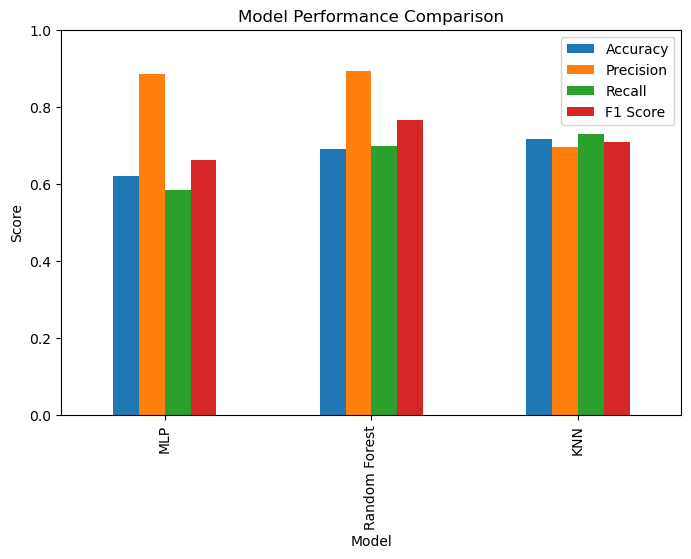

🏆 Best overall model saved as best_model.pkl: KNN


In [5]:
# 📌 Cell 5 — Model Comparison & Selection
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

print("\n🔹 Step 5: Comparing models...")

# Load saved models
best_model_mlp = joblib.load("best_mlp.pkl")
best_model_rf = joblib.load("best_rf.pkl")
best_model_knn = joblib.load("best_knn.pkl")
scaler = joblib.load("scaler.pkl")

models = {
    "MLP": best_model_mlp,
    "Random Forest": best_model_rf,
    "KNN": best_model_knn
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='macro', zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average='macro', zero_division=0)
    })

# Create results DataFrame
results_df = pd.DataFrame(results).round(4)
print("\n📊 Model Performance Table:")
print(results_df)

# Save metrics for Streamlit
results_df.to_csv("model_metrics.csv", index=False)
print("✅ Metrics table saved as model_metrics.csv for Streamlit.")

# Bar chart
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# Save the best overall model
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
joblib.dump(models[best_model_name], "best_model.pkl")
print("🏆 Best overall model saved as best_model.pkl:", best_model_name)
